# 4. CellPy Feature Ranking

## Feature Ranking Options

featureRankingOne is a CellPy option that allows the user to rank the genes in the single cell RNA training dataset according to their contributions toward the XGBoost models' predictions. More influential genes (known as features) will be ranked higher, giving the user insight into how the algorithm makes its predictions. Feature ranking utilizes the SHAP package and evaluates the importance (Shapley value (Lundberg, etal., 2020)) of each gene toward the XGBoost models' predictions. The parameters the user inputs for this option should therefore only be the csv files used in training for an accurate interpretation of each `Layer`. The required parameters and sample code required to run each are listed below.

*Note: CellPy creates and stores information from model training in `Layer` objects, including the name of the layer, its depth in metadata files, the dictionary associated with each layer, and the XGBoost model itself. Prediction and feature ranking require `Layer` objects as input and can therefore only be run after `trainAll` has been completed. Details for the `Layer` class can be found at the end of this tutorial.*

featureRankingOne: Conduct feature ranking analysis on provided Layer objects with the SHAP package
* (runMode = featureRankingOne, trainNormExpr, trainMetadata, layerObjectPaths, featureRankingSplit)
* Example: `cellpy --runMode featureRankingOne --trainNormExpr /cellpy_example/zheng_pbmc_10K.csv --trainMetadata /cellpy_example/zheng_pbmc_10K_metadata.csv --layerObjectPaths /cellpy_example/cellpy_results_20210720155257/training/Root_object.pkl,/cellpy_example/cellpy_results_20210720155257/training/CD4_object.pkl,/cellpy_example/cellpy_results_20210720155257/training/CD8_object.pkl,/cellpy_example/cellpy_results_20210720155257/training/T-cell_object.pkl --featureRankingSplit 0.1`

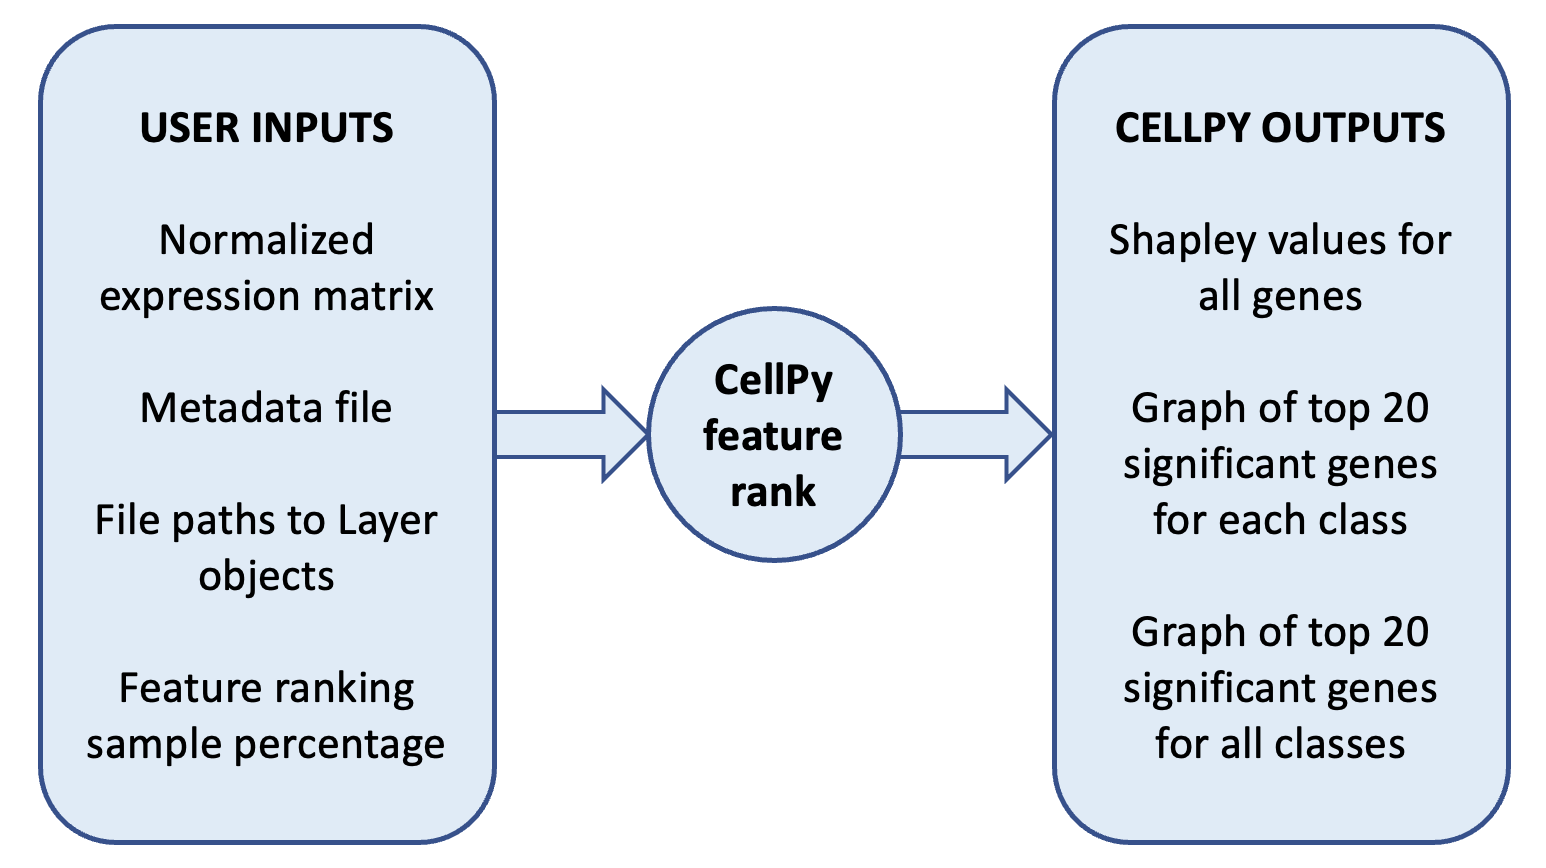

## REQUIRED USER INPUTS:

-  **trainNormExpr**: normalized expression matrix file
-  **trainMetadata**: metadata file
-  **layerObjectPaths**: a list of path names to Layer objects
-  **featureRankingSplit (optional)**: float between 0 and 1 denoting the percentage of data to calculate SHAP importances, default is 0.3

### trainNormExpr

##### FORMAT: csv file

* contains normalized expression of genes for each single cell 
* first column: gene names
* row headers: cell barcodes
* row 1 column 1 is 'gene'

##### EXAMPLE:

`gene,AAACCCAG........,AAACGAAC........,AAACGAAT........,GAGGGATC........
MIR1302-10,0,2.14693417019908,2.31409562022533,0
OR4F29,0,1.71783906814673,0,0
LINC00115,0,0,0,2.8499342352407
ISG15,2.99811039595896,0,2.41534932603235,0`

### trainMetadata

##### FORMAT: csv file

-  row 1, column 1 should be `NA`, ie. empty when opened in Excel
-  first column contains cell names, should be in the same order as first row of trainNormExpr
-  each column following contains the layered identification for each cell
-  all other cells should be NA or empty
* a single row contains a cell barcode and then the cell label corresponding to each subtype category
*  all other cells should be `NA`, ie. empty when opened in Excel

##### EXAMPLE:

`,Celltype1,Celltype2,Celltype3
AAACCCAG........,Monocyte,NA,NA
AAACGAAC........,NK,NA,NA
AAACGAAT........,Macrophage,NA,NA
GAGGGATC........,T-cell,"CD8,"Effector Memory CD8`

### layerObjectPaths

##### FORMAT: a comma-separated list of paths to the trained Layer objects (pickle .pkl files)
-  not all models have to be provided, can conduct feature ranking on individual targetted layers
* *NOTE: do NOT rename the .pkl Layer objects*

##### EXAMPLE:

`/scratch/groups/smwu/sidraxu/pbmc_10k_metadata.csv --layerObjectPaths /scratch/groups/smwu/sidraxu/cellpy_results_20210720155257/training/Root_object.pkl,/scratch/groups/smwu/sidraxu/cellpy_results_20210720155257/training/CD4_object.pkl,/scratch/groups/smwu/sidraxu/cellpy_results_20210720155257/training/CD8_object.pkl,/scratch/groups/smwu/sidraxu/cellpy_results_20210720155257/training/T-cell_object.pkl`

### featureRankingSplit (Optional, Default = 0.3)

##### FORMAT: float between 0 and 1

-  a rejection cutoff of 0.5 means a cell will be regarded as "Unclassified" if no class has a predicted probability greater than 50%
-  taking into consideration computational limitations, the default value for the amount of data sampled for feature ranking from the training data is 0.3 (30%)
-  the holdout dataset is stratified and preserves the proportions of the cell labels in the original dataset

## OUTPUT OF FEATURERANKINGONE:

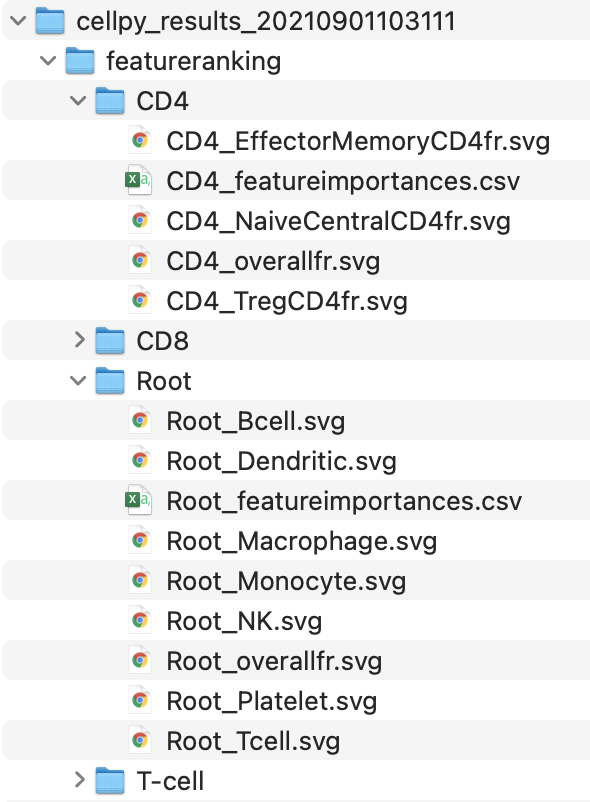

* creates directory "featureranking" in a folder named "cellpy_results_(time)"
* within "featureranking" there will be a separate folder for each Layer, with 'Root' being the first Layer
* each Layer folder contains the following:
    * graphs with top 20 genes for each class
    * graph with top 20 genes for all classes
    * csv file of the Shapley value for all genes for all classes

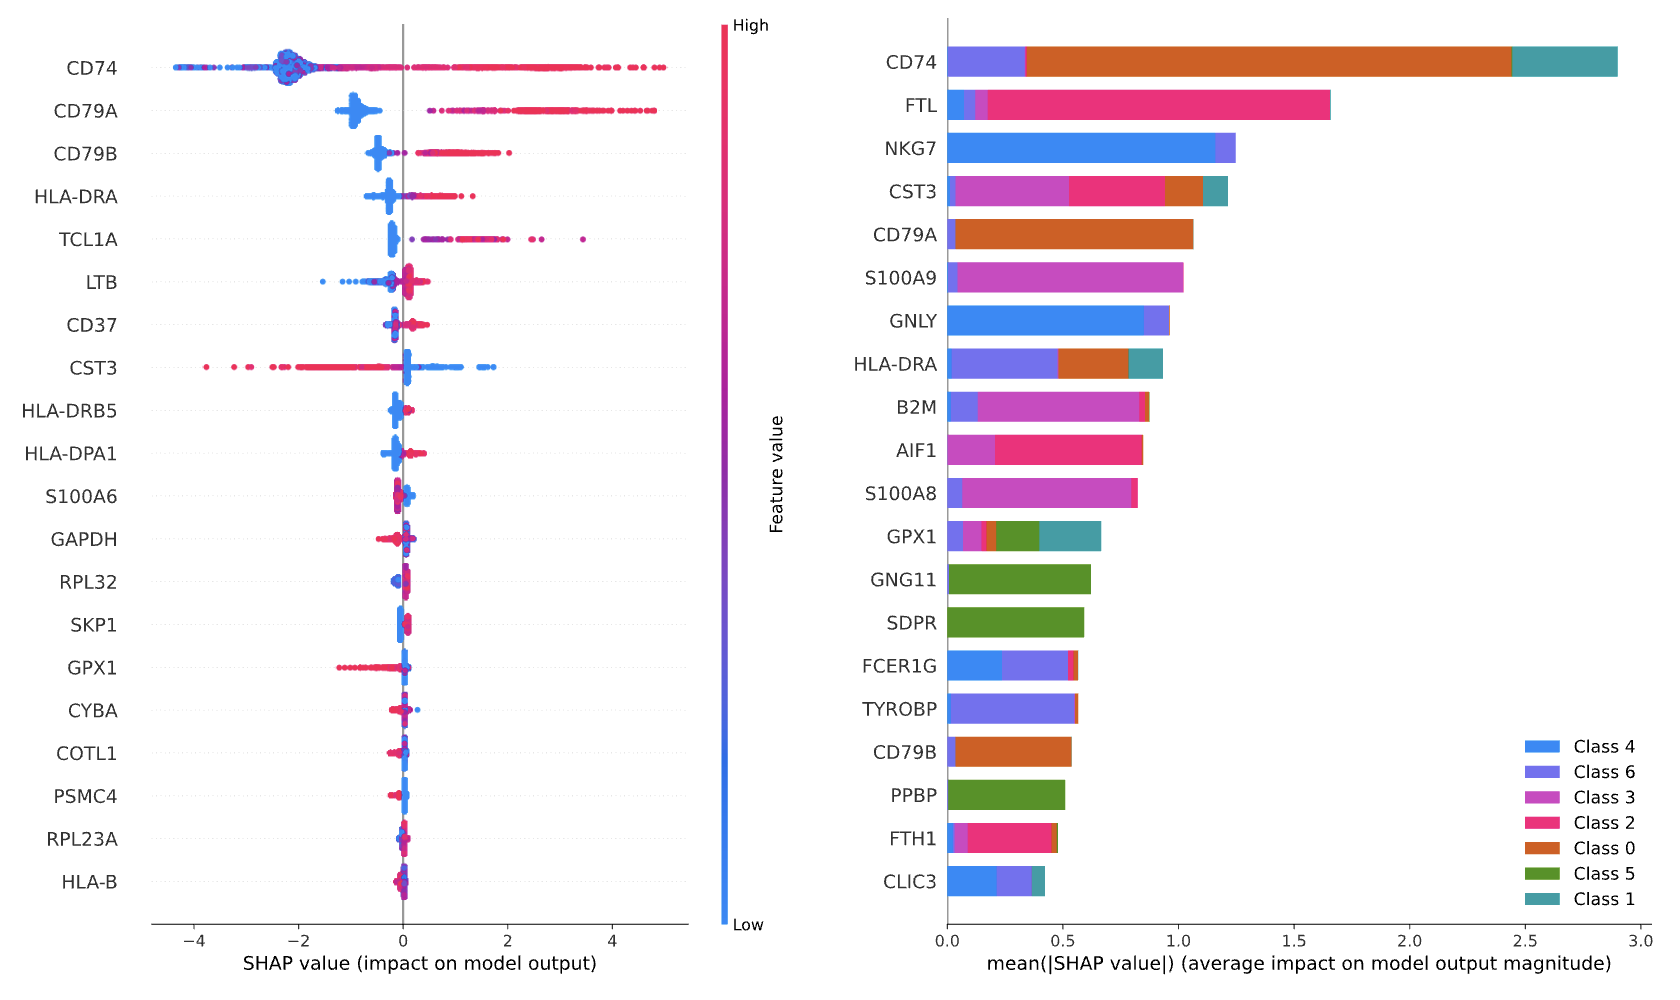
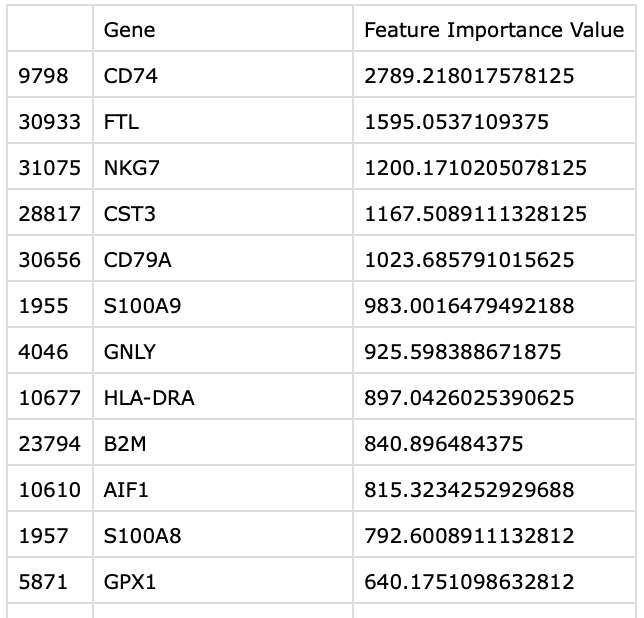

# Back to Table of Contents

[Table of Contents](tableofcontents.ipynb#toc)